# Proyek Analisis Data: [Input Nama Dataset]

Nama: Fakhrus Syakir
Email: fakhroosyakir@gmail.com
ID Dicoding: khroos

## Menentukan Pertanyaan Bisnis

1. Bagaimana  trend polusi udara di Wanshouxigong selama 5 tahin terakhir?
2. Bagaimana korelasi dari polusi udara terhadap variabel lainnya?
3. Bagaimana korelasi antara temprature dan dew point (DEWP) di Wanshouxigong?
4. Apakah pernah terjadi keadaan ketika PM2.5 dan PM10 menjadi berbahaya Di kota Wanshouxigong?
5. Bagaimana GeoDataFrame Visualization di Streamlit

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd

## Data Wrangling

### Gathering Data

This code snippet is reading a CSV file from a URL using pandas library in Python. The CSV file is located at the provided URL "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv". The data from the CSV file is then loaded into a pandas DataFrame called `gong_df`. Finally, `gong_df.head()` is displaying the first few rows of the DataFrame to give a preview of the data.


In [2]:
gong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
gong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

The `gong_df.info()` method in pandas is used to display a concise summary of a DataFrame. It provides information about the DataFrame including the number of non-null values in each column, the data type of each column, and memory usage. This method is useful for quickly understanding the structure and contents of a DataFrame.


In [3]:
gong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


`gong_df.isna().sum()` is checking for missing values (NaN values) in the DataFrame `gong_df` and then summing up the count of missing values for each column.


In [4]:
gong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

This code snippet is calculating the number of duplicated rows in the DataFrame `gong_df` and then printing the result along with the message "Jumlah duplikasi: ". The `duplicated()` function is used to identify duplicate rows in the DataFrame, and `sum()` is used to count the total number of duplicates.


In [5]:
print("Jumlah duplikasi: ", gong_df.duplicated().sum())

Jumlah duplikasi:  0


`gong_df.describe()` is a method in pandas that generates descriptive statistics of the DataFrame `gong_df`. It provides statistical information such as count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns in the DataFrame.


In [6]:
gong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### Cleaning Data

This code snippet is filling missing values in the columns 'CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3', and 'wd' of the DataFrame `gong_df` using the forward fill method (`method='ffill'`).


In [7]:
gong_df[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3','wd']] = gong_df[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3','wd']].fillna(method='ffill')

gong_df.isna().sum()

/var/folders/67/kvk7bnw55nq_jhcv1q2gw95r0000gn/T/ipykernel_61009/4255489742.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gong_df[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3','wd']] = gong_df[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3','wd']].fillna(method='ffill')


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       19
PRES       19
DEWP       19
RAIN       19
wd          0
WSPM       13
station     0
dtype: int64

This code snippet is converting the columns specified in the `numeric_cols` list to numeric data type using the `pd.to_numeric` function. The `errors='coerce'` parameter is used to handle any errors that occur during the conversion by replacing them with NaN values. This is a common approach to convert columns to numeric type while handling any non-numeric values gracefully. And filling in missing values in the columns specified in the `numeric_cols` list with the mean value of each respective column.

In [8]:
numeric_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
gong_df[numeric_cols] = gong_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

gong_df[numeric_cols] = gong_df[numeric_cols].fillna(gong_df[numeric_cols].mean())

gong_df.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

This code snippet is dropping the 'station' column from the DataFrame `gong_df` and then displaying the first few rows of the modified DataFrame using the `head()` function.


In [9]:
gong_df = gong_df.drop(columns = {'station'})
gong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2,3,2013,3,1,2,8.0,8.0,7.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,200.0,59.0,-0.7,1023.5,-20.9,0.0,NW,2.6
4,5,2013,3,1,4,8.0,8.0,3.0,16.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5


## Exploratory Data Analysis (EDA)

## Explore Wanshouxigong Air Data

This code snippet is converting the columns 'year', 'month', 'day', and 'hour' in the DataFrame `gong_df` to categorical data types. By converting these columns to categorical data types, you can save memory and improve performance when working with these columns, especially if they have a limited number of unique values.


In [10]:
gong_df['year'] = gong_df['year'].astype('category')
gong_df['month'] = gong_df['month'].astype('category')
gong_df['day'] = gong_df['day'].astype('category')
gong_df['hour'] = gong_df['hour'].astype('category')
gong_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.0,35064.0,35064.0,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000
unique,NaN,5.0,12.0,31.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
top,NaN,2016.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,8784.0,2976.0,1152.0,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,NaN
mean,17532.500000,NaN,NaN,NaN,NaN,85.356562,112.729215,17.369966,55.643387,1376.914243,55.978065,13.784477,1011.511804,2.707442,0.064320,NaN,1.745314
std,10122.249256,NaN,NaN,NaN,NaN,86.627607,98.700415,24.270784,36.092564,1238.856861,57.165967,11.382071,10.568064,13.700426,0.796765,NaN,1.206131
min,1.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,NaN,0.000000
25%,8766.750000,NaN,NaN,NaN,NaN,22.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,NaN,0.900000
50%,17532.500000,NaN,NaN,NaN,NaN,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.700000,1011.000000,3.300000,0.000000,NaN,1.400000
75%,26298.250000,NaN,NaN,NaN,NaN,117.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,NaN,2.300000


This code snippet is selecting specific columns from a DataFrame `gong_df` based on the list `selected_columns`, then calculating the correlation matrix for these selected columns.


In [11]:
selected_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
selected_df = gong_df[selected_columns]

correlation_matrix = selected_df.corr()

print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.882580  0.501614  0.693154  0.808782 -0.195160 -0.187134   
PM10   0.882580  1.000000  0.500151  0.677121  0.734418 -0.148081 -0.147921   
SO2    0.501614  0.500151  1.000000  0.487096  0.553781 -0.186340 -0.354925   
NO2    0.693154  0.677121  0.487096  1.000000  0.742033 -0.519691 -0.309370   
CO     0.808782  0.734418  0.553781  0.742033  1.000000 -0.332573 -0.339448   
O3    -0.195160 -0.148081 -0.186340 -0.519691 -0.332573  1.000000  0.615750   
TEMP  -0.187134 -0.147921 -0.354925 -0.309370 -0.339448  0.615750  1.000000   
PRES   0.035940 -0.001194  0.205710  0.144085  0.169678 -0.453569 -0.828467   
DEWP   0.071392  0.039776 -0.288987 -0.031225 -0.052981  0.332472  0.817473   
RAIN  -0.020304 -0.033870 -0.042558 -0.047518 -0.015871  0.024392  0.039014   
WSPM  -0.296539 -0.230612 -0.137154 -0.471748 -0.336009  0.315037  0.061499   

           PRES      DEWP      RAIN      WSPM  
PM2

This code snippet is grouping the DataFrame `gong_df` by the column 'year' and then calculating the mean values for the columns 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', and 'O3' for each group (each unique year). The resulting DataFrame `polusi_pertahun` will have the mean values of these pollutants for each year.`polusi_pertahun = polusi_pertahun.reset_index()` is resetting the index of the DataFrame `polusi_pertahun`. By calling this method, the current index of the DataFrame is reset to the default integer index (0, 1, 2, ...). This operation will move the existing index (in this case, the 'year' column) back to a regular column in the DataFrame and a new default integer index will be set for the DataFrame rows. After that, converting the 'year' column in the DataFrame 'polusi_pertahun' to a string data type and assigning it to a new column named 'time'. This conversion is done using the `astype(str)` method, which converts the values in the 'year' column from integers to strings. `polusi_pertahun.head()` is displaying the first few rows of the DataFrame `polusi_pertahun`. It is a way to quickly inspect the data and see a snapshot of the information contained in the DataFrame.


In [12]:
polusi_pertahun = gong_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
polusi_pertahun = polusi_pertahun.reset_index()
polusi_pertahun['time'] = polusi_pertahun["year"].astype(str)
polusi_pertahun.head()

/var/folders/67/kvk7bnw55nq_jhcv1q2gw95r0000gn/T/ipykernel_61009/1203419321.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  polusi_pertahun = gong_df.groupby(by = ['year'] ).agg({


,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,83.772535,111.192334,21.775693,56.038906,1412.720724,53.010657,2013
1,2014,91.518402,128.047568,23.357705,62.361553,1453.504566,56.458139,2014
2,2015,84.497009,111.400000,14.308938,52.826918,1369.406393,59.280514,2015
3,2016,78.018784,98.613274,10.574112,50.043716,1219.911202,58.216758,2016
4,2017,106.288842,121.723870,18.571328,64.191384,1737.782486,34.080508,2017


## Clustering



This code snippet is performing K-means clustering on a dataset called `polusi_pertahun` using the specified columns for clustering: 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'.


In [13]:
columns_for_clustering = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

num_clusters = 3

cluster_df = polusi_pertahun[['time']].copy()

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

cluster_df['cluster'] = kmeans.fit_predict(polusi_pertahun[columns_for_clustering])


The code `print(cluster_df)` is used to display the contents of the variable `cluster_df` in the output console. It is a way to visually inspect the data stored in the variable and can be helpful for debugging or understanding the structure of the data.



In [14]:
print(cluster_df)

   time  cluster
0  2013        0
1  2014        0
2  2015        0
3  2016        2
4  2017        1


## Geoanalysis

This code snippet is using the GeoPandas library to create a GeoDataFrame from a DataFrame named `polusi_pertahun`. The `geometry` column of the GeoDataFrame is being created by using the `gpd.points_from_xy` function with the longitude and latitude columns from the `polusi_pertahun` DataFrame.


This code snippet is creating a synthetic dataset `synthetic_data` containing information about time, latitude, longitude, PM2.5, and PM10 values. It then creates a GeoDataFrame `gdf` using `geopandas` library, where the geometry is generated from latitude and longitude values.


/var/folders/67/kvk7bnw55nq_jhcv1q2gw95r0000gn/T/ipykernel_61009/3836928355.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


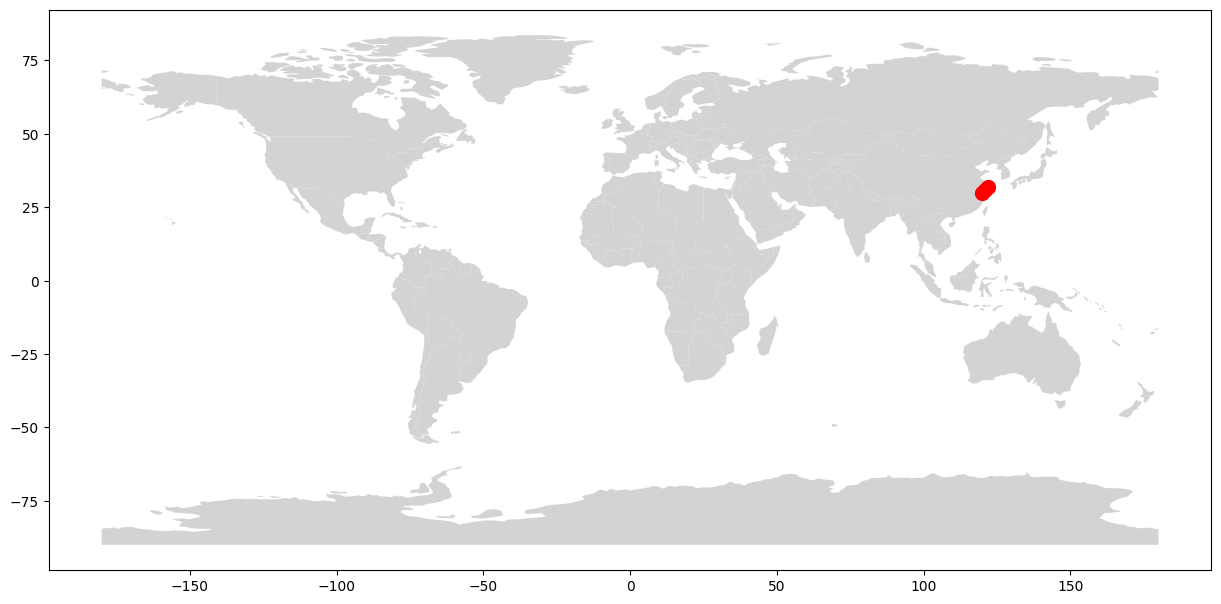

In [18]:
synthetic_data = {
    'time': ['2018', '2019', '2020'],
    'latitude': [30.0, 31.0, 32.0],
    'longitude': [120.0, 121.0, 122.0],
    'PM2.5': [25, 30, 20],
    'PM10': [40, 35, 45],
}

gdf = gpd.GeoDataFrame(synthetic_data, geometry=gpd.points_from_xy(synthetic_data['longitude'], synthetic_data['latitude']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=100)
plt.show()

## Visualization & Explanatory Analysis

This code snippet defines two functions `categorize_air_pollution_level` to categorize air pollution levels based on the input values of PM2.5 and PM10 respectively. If the input value is less than or equal to 50, it categorizes it as 'Tidak Berbahaya' (Not Dangerous), otherwise it categorizes it as 'Berbahaya' (Dangerous).


/var/folders/67/kvk7bnw55nq_jhcv1q2gw95r0000gn/T/ipykernel_61009/2851726761.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


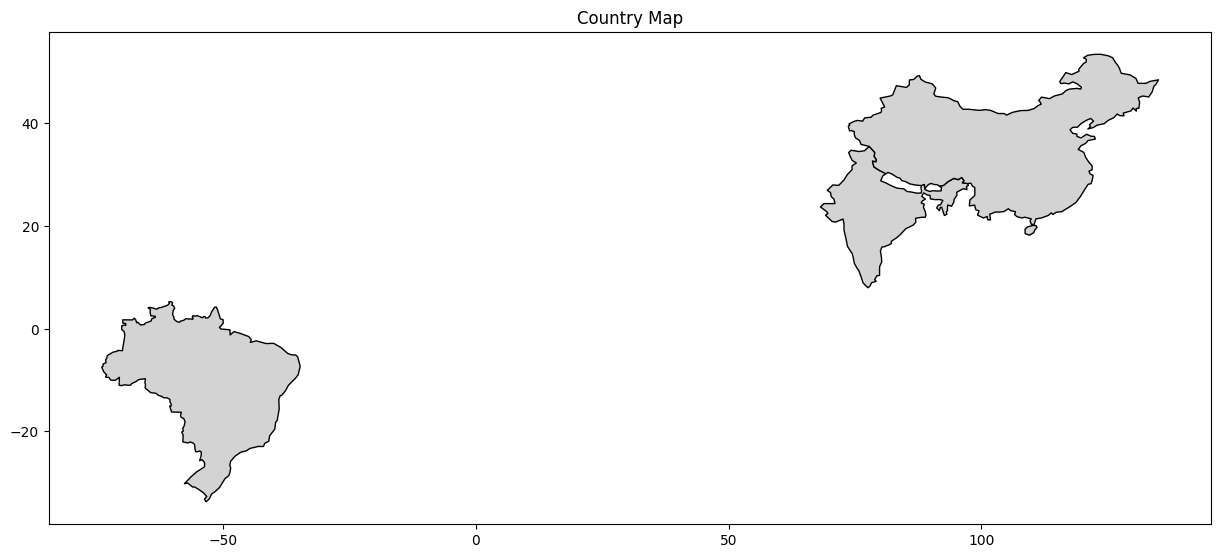

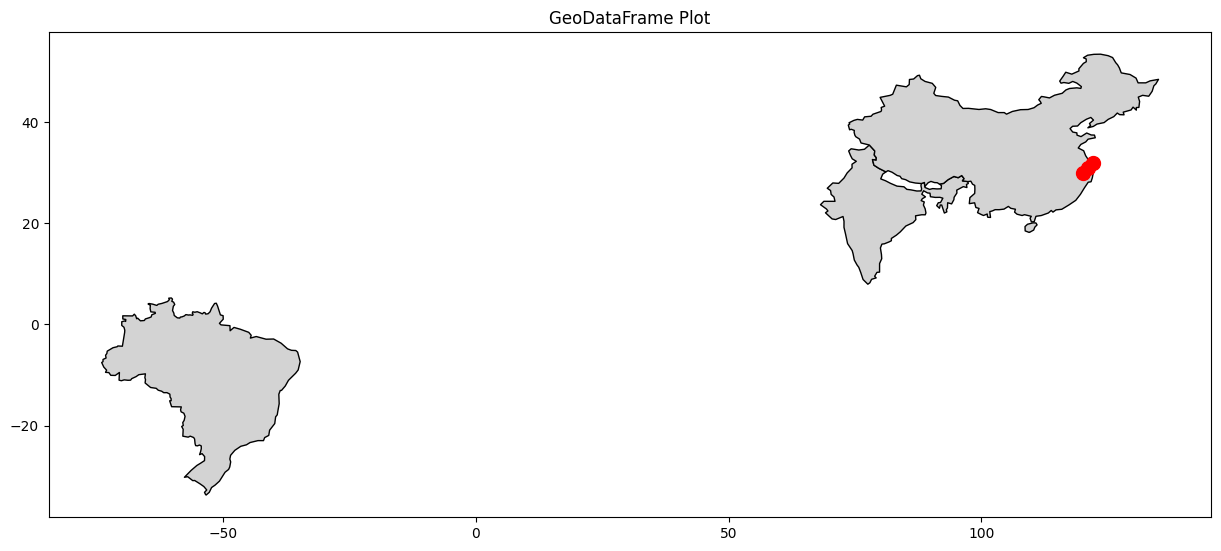

In [19]:
# Create a synthetic DataFrame with latitude and longitude columns
synthetic_data = {
    'time': ['2018', '2019', '2020'],
    'latitude': [30.0, 31.0, 32.0],
    'longitude': [120.0, 121.0, 122.0],
    'PM2.5': [25, 30, 20],
    'PM10': [40, 35, 45],
}

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(synthetic_data, geometry=gpd.points_from_xy(synthetic_data['longitude'], synthetic_data['latitude']))

# World map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Select specific countries
selected_countries = ['China', 'India', 'United States', 'Brazil']

# Filter the world GeoDataFrame
filtered_world = world[world['name'].isin(selected_countries)]

# Display the filtered world map
fig, ax = plt.subplots(figsize=(15, 10))
filtered_world.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.title("Country Map")
plt.show()

# Display the GeoDataFrame plot
fig, ax = plt.subplots(figsize=(15, 10))
filtered_world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=100)
plt.title("GeoDataFrame Plot")
plt.show()

# DATA VISUALISATION

### 1.Bagaimana  trend polusi udara di Wanshouxigong selama 5 tahin terakhir?




This function `air_polution_graph(gong)` is creating a multi-plot graph to visualize the trend of air pollution data over time. It uses Matplotlib to create a figure with 3 rows and 2 columns of subplots, each representing a different air pollutant (PM2.5, PM10, SO2, NO2, CO, O3).

In [ ]:
def air_polution_graph(gong):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(gong['time'], gong['PM2.5'], marker='o', linewidth=5, color="skyblue")
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=28)
    ax[0,0].set_ylabel("PM2.5", fontsize=25)
    ax[0,0].set_title("PM2.5", loc="center", fontsize=50)

    ax[0,1].plot(gong['time'], gong['PM10'], marker='x', linewidth=5, color="skyblue")
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=28)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=50)

    ax[1,0].plot(gong['time'], gong['SO2'], marker='x', linewidth=5, color="skyblue")
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=28)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=50)

    ax[1,1].plot(gong['time'], gong['NO2'], marker='x', linewidth=5, color="skyblue")
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=28)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=50)


    ax[2,0].plot(gong['time'], gong['CO'], marker='x', linewidth=5, color="skyblue")
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=28)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=50)


    ax[2,1].plot(gong['time'], gong['O3'], marker='x', linewidth=5, color="skyblue")
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=28)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=50)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Polusi udara di Wanshouxigong \n selama 5 tahin terakhir", fontsize=80, y=1.1)
    plt.show()


The code `air_polution_graph(polusi_pertahun.head())` is likely calling a function named `air_polution_graph` and passing the first few rows of a DataFrame named `polusi_pertahun` to it. The function is expected to generate a graph or visualization based on the data provided in the DataFrame. The `.head()` method is used to select the first few rows of the DataFrame for visualization.


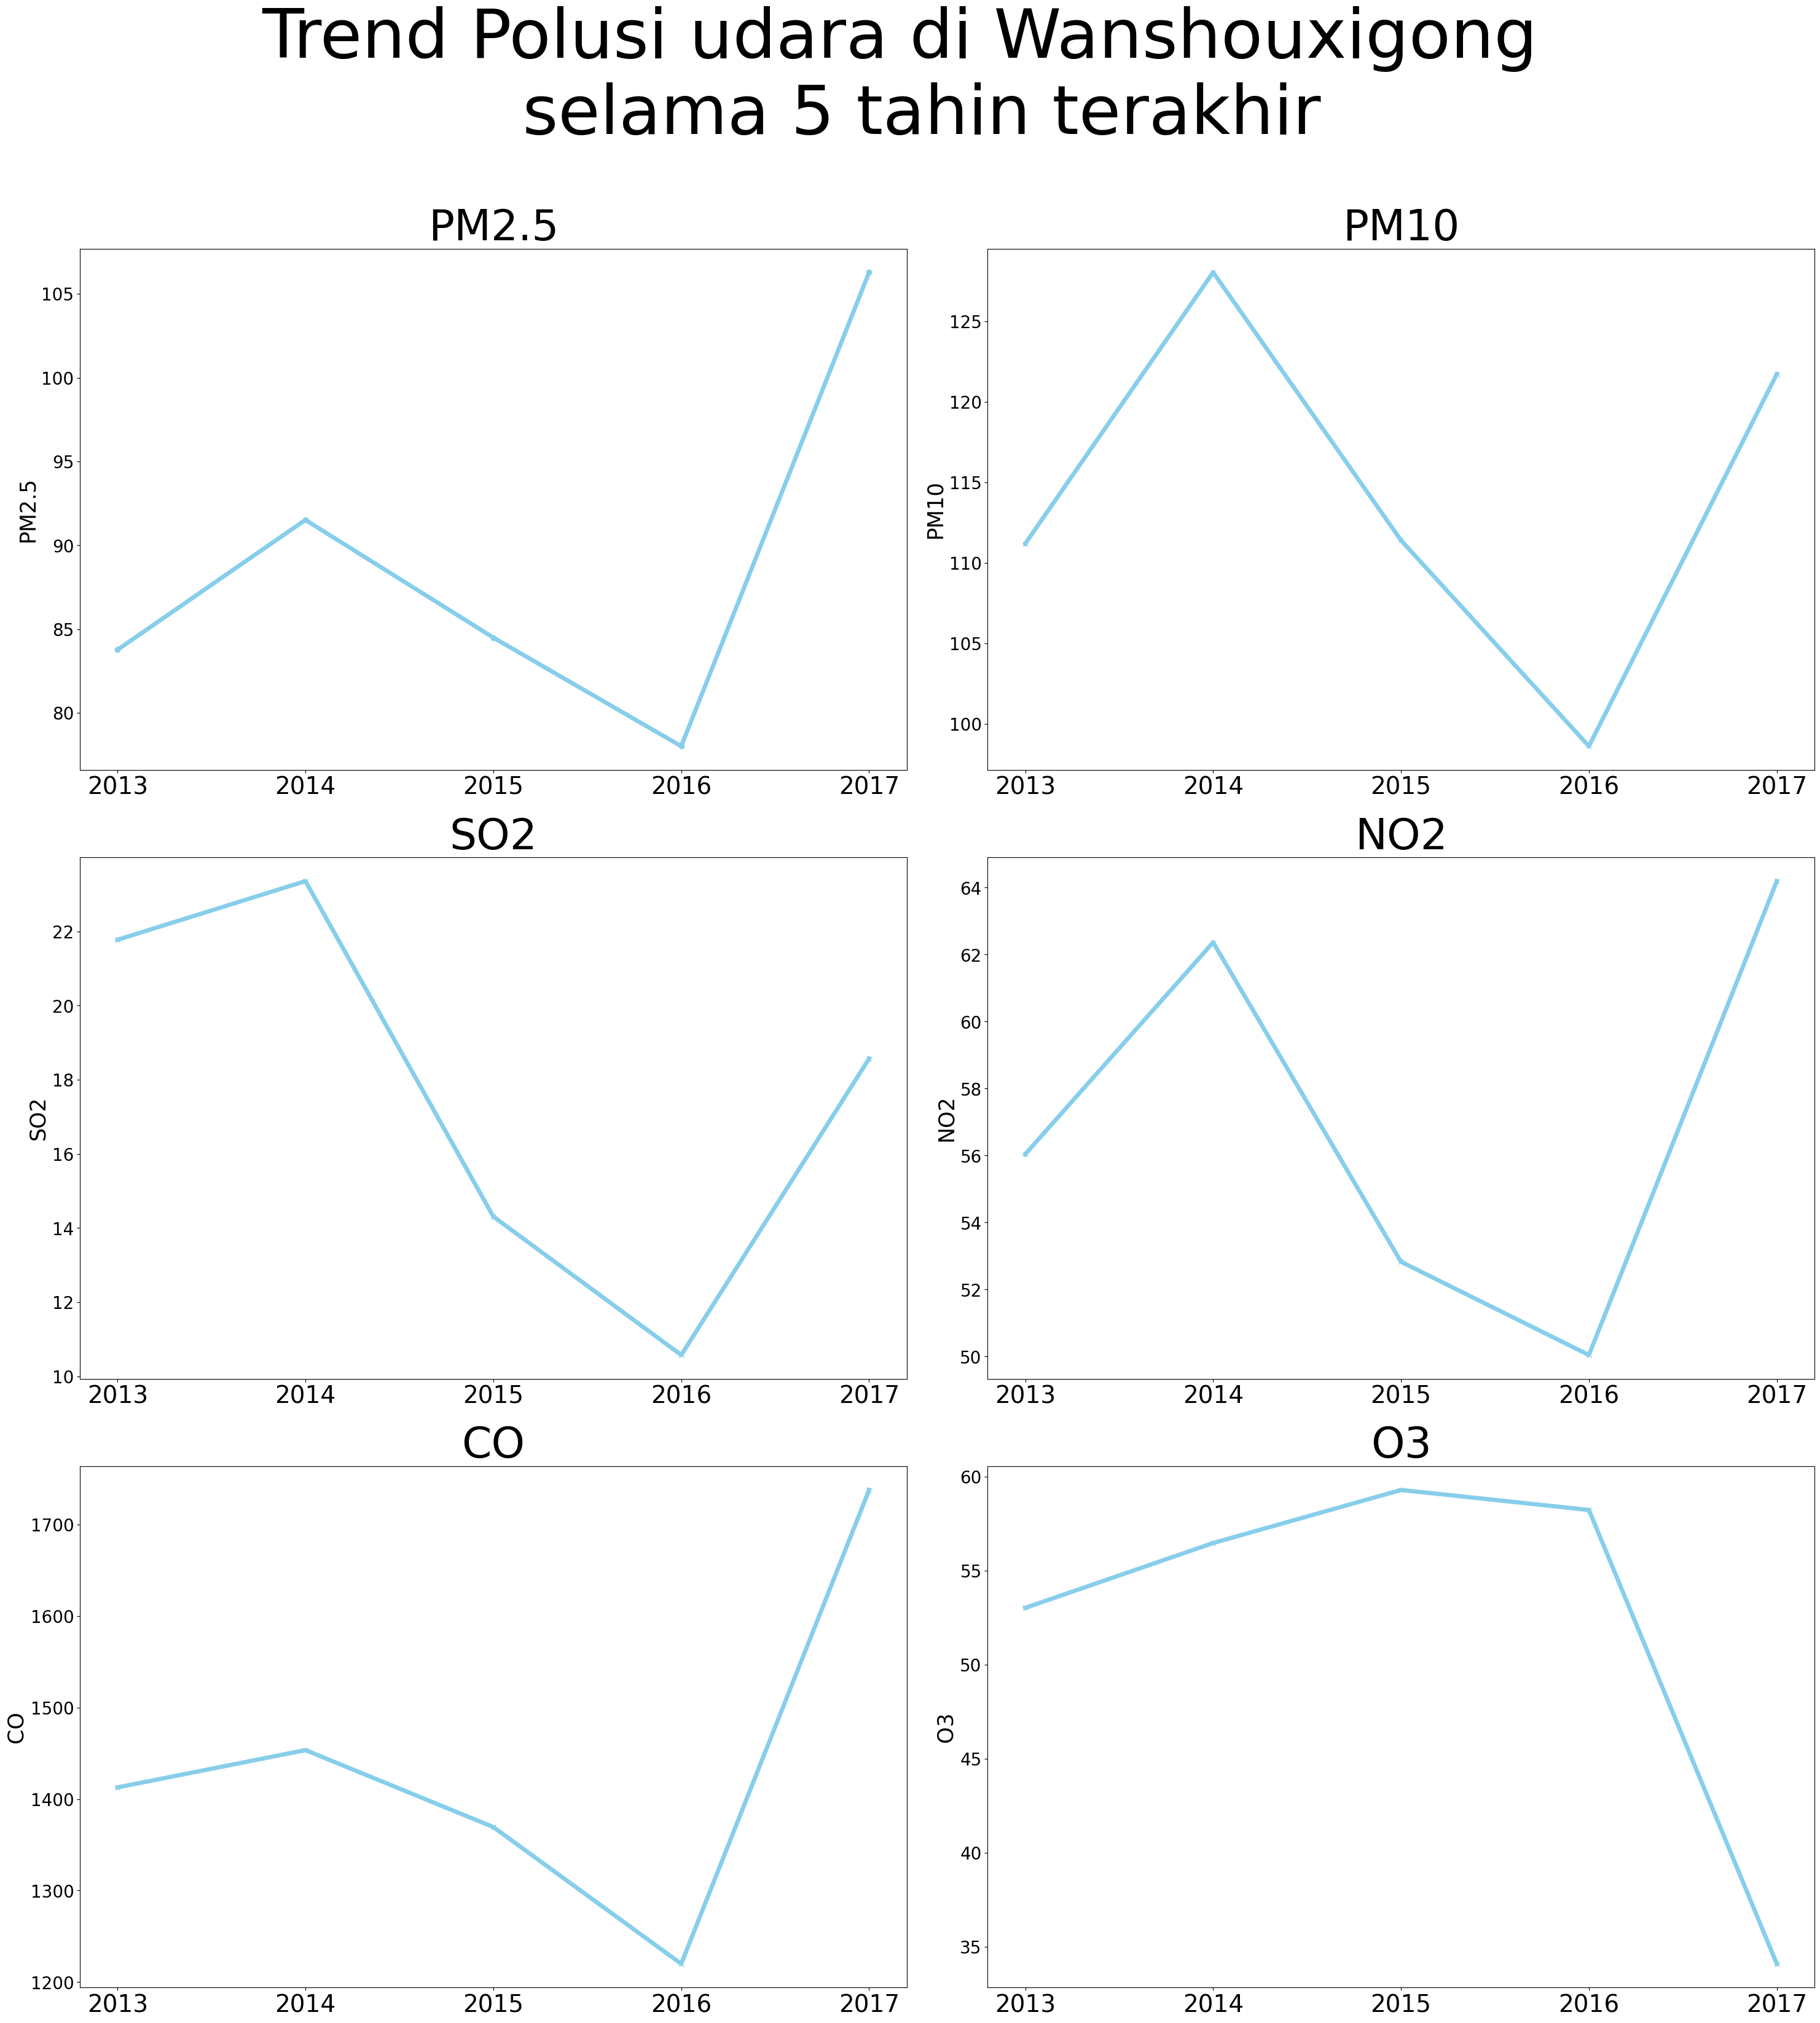

In [ ]:
air_polution_graph(polusi_pertahun.head())

### 2. Bagaimana korelasi dari polusi udara terhadap variabel lainnya?

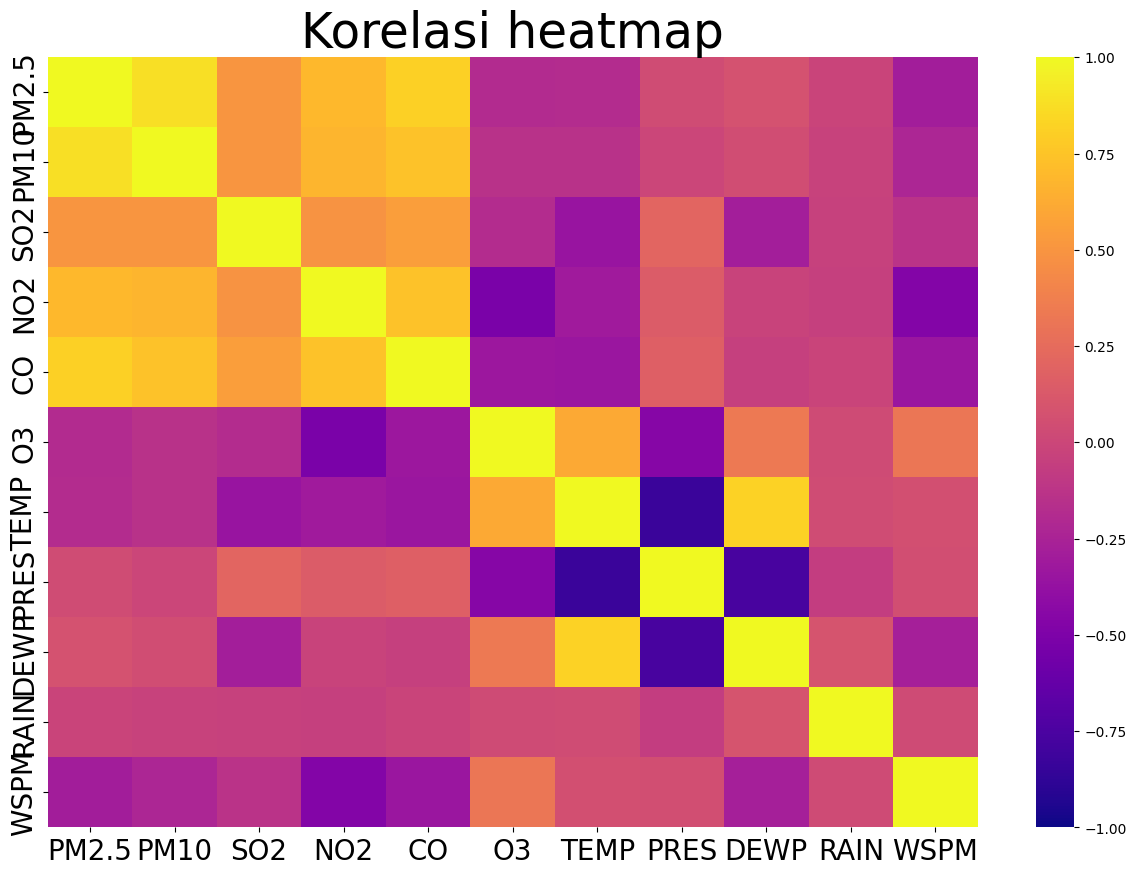

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax = 1, vmin = -1, center = 0, cmap = "plasma")
ax.tick_params(labelsize = 20)
ax.set_title("Korelasi heatmap", loc="center", fontsize=35)

plt.show()

### 3. Bagaimana korelasi antara temprature dan dew point (DEWP) di Wanshouxigong?

This code snippet is creating a regression plot using the Seaborn library. It is plotting a regression line between the 'DEWP' (Dew Point Temperature) and 'TEMP' (Temperature) columns from the 'gong_df' DataFrame. The scatter plot points are customized to have a size of 10, and the regression line is colored red. The plot is then given a title 'Regplot antara DEWP dan TEMP' with labels for the x-axis ('DEWP') and y-axis ('TEMP'). Finally, the plot is displayed using `plt.show()`.


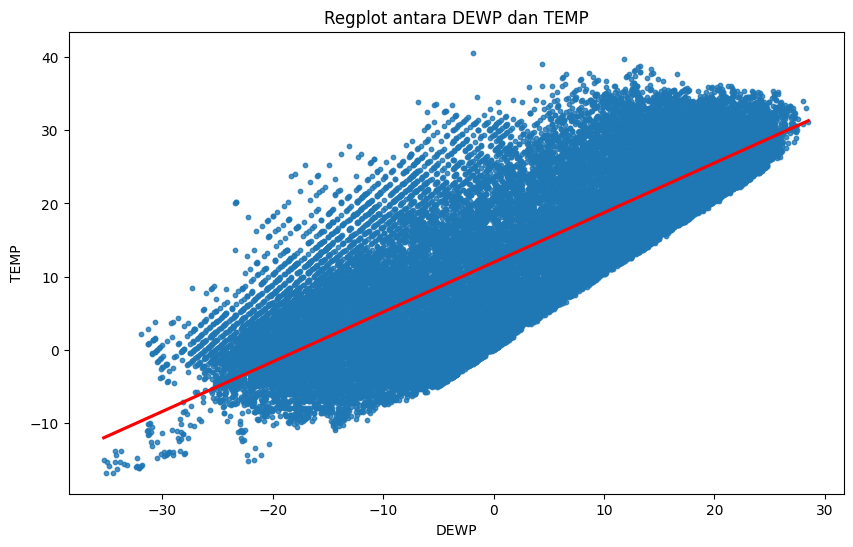

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='DEWP', y='TEMP', data=gong_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regplot antara DEWP dan TEMP')
plt.xlabel('DEWP')
plt.ylabel('TEMP')
plt.show()

### 4. Apakah pernah terjadi keadaan ketika PM2.5 dan PM10 menjadi berbahaya Di Wanshouxigong?

This code snippet is creating bar plots to visualize the frequency distribution of air pollution levels for PM2.5 and PM10 pollutants in a dataset called `gong_df`.


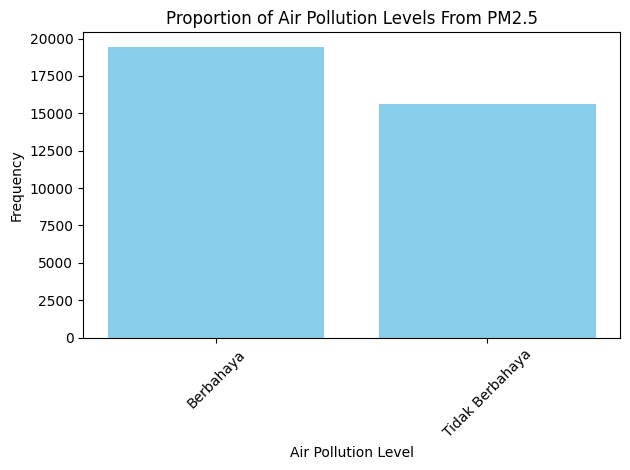

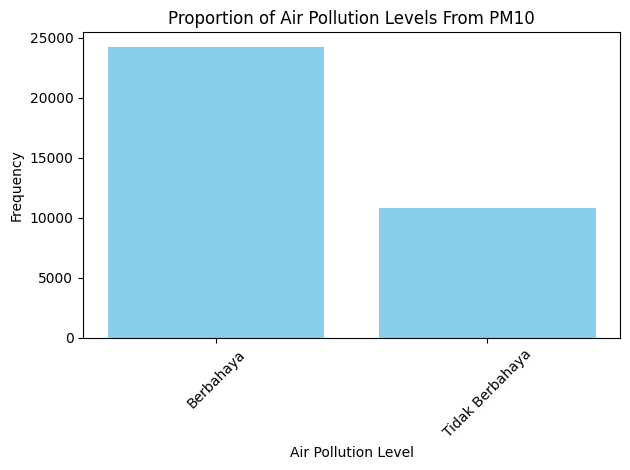

In [ ]:
pm25_counts = gong_df['Air Pollution Level (PM2.5)'].value_counts()

plt.bar(pm25_counts.index, pm25_counts.values, color='skyblue')

plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.title('Proportion of Air Pollution Levels From PM2.5')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

pm10_counts = gong_df['Air Pollution Level (PM10)'].value_counts()

plt.bar(pm10_counts.index, pm10_counts.values, color='skyblue')

plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.title('Proportion of Air Pollution Levels From PM10')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

This line of code is saving the DataFrame `gong_df` to a CSV file named "all_data.csv" without including the index column in the CSV file. The `index=False` parameter specifies that the index column should not be included in the CSV file.

In [ ]:
gong_df.to_csv("all_data.csv", index=False)


## Conclusion

1. Dari Trend Polusi selama 5 tahun terakhir dapat ditarik kesimpulan bahwa pada setiap indikator (PM2.5, PM10, SO2, NO2,dan Co) mengalami fluktuasi

2. Dari korelasi Heatmap didapatkan bahwa polusi udara berkorelasi rendah terhadap variabel lainnya(O3, TEMP, PRES, DEWP, RAIN,dan WSPM) 

3. Dari Regplot yang dihasilkan didapatkan korelasi antara suhu udara (temperature) dan titik embun (dew point) erat kaitannya, karena titik embun adalah suhu di mana udara menjadi jenuh dan uap air mulai mengembun menjadi tetesan air.

4. Dari proporsi polusi udara yang ditampilkan dapat disimpulkan bahwa di Wanshouxigong terdapat lebih dari 2000 kali keadaan polusi udara menjadi berbahaya, melebihi dari keadaan tidak berbahaya